# Submitted By : 
# Parmeen Singh H Bindra 
parmeen.bindra@gmail.com

312-757-0920

https://www.linkedin.com/in/parmeenbindra/

In [25]:
from google.colab import files
uploaded = files.upload()

Saving screening_exercise_orders_v201810.csv to screening_exercise_orders_v201810 (1).csv


In [64]:
from scipy import stats 
import pandas as pd #for data manipulation & analyses
import matplotlib.pyplot as plt #for plotting graphs
import numpy as np  #for mathematical & array functions
import dateutil #for date-time functions
import seaborn as sns 
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, precision_score, recall_score #for our confusion matrix

In [65]:
dataset = pd.read_csv("screening_exercise_orders_v201810.csv")

In [66]:
print (dataset)

       customer_id  gender                 date   value  predicted_gender
0             1000       0  2017-01-01 00:11:31  198.50                 1
1             1001       0  2017-01-01 00:29:56  338.00                 1
2             1002       1  2017-01-01 01:30:31  733.00                 1
3             1003       1  2017-01-01 01:34:22  772.00                 1
4             1004       0  2017-01-01 03:11:54  508.00                 1
...            ...     ...                  ...     ...               ...
13466         9810       1  2017-12-31 22:16:20  794.44                 0
13467         9811       1  2017-12-31 22:24:06  148.60                 0
13468         9812       0  2017-12-31 23:01:10  153.00                 1
13469         9813       0  2017-12-31 23:11:02  534.00                 1
13470         8658       0  2017-12-31 23:35:09  306.60                 1

[13471 rows x 5 columns]


# A) 
### Assemble a dataframe with one row per customer and the following columns:

* customer_id
* gender
* most_recent_order_date
* order_count (number of orders placed by this customer)

### Sort the dataframe by customer_id ascending and display the first 10 rows.

In [67]:
#We have 'customer_id' and 'gender' in our original dataset
#Calculating 'most_recent_order_date', sorted ASC on 'customer_id'
most_recent_order_date = dataset.groupby(['customer_id','gender'], sort=True)['date'].max()

In [68]:
#convert to data frame for 'most_recent_order_date'
most_recent_order_date_df = most_recent_order_date.to_frame().reset_index()
print(most_recent_order_date_df)


      customer_id  gender                 date
0            1000       0  2017-01-01 00:11:31
1            1001       0  2017-01-01 00:29:56
2            1002       1  2017-02-19 21:35:31
3            1003       1  2017-04-26 02:37:20
4            1004       0  2017-01-01 03:11:54
...           ...     ...                  ...
8809         9809       1  2017-12-31 21:39:33
8810         9810       1  2017-12-31 22:16:20
8811         9811       1  2017-12-31 22:24:06
8812         9812       0  2017-12-31 23:01:10
8813         9813       0  2017-12-31 23:11:02

[8814 rows x 3 columns]


In [69]:
#Rename 'date' to 'most_recent_order_date'
most_recent_order_date_df.columns = ['customer_id','gender','most_recent_order_date']
print(most_recent_order_date_df)

      customer_id  gender most_recent_order_date
0            1000       0    2017-01-01 00:11:31
1            1001       0    2017-01-01 00:29:56
2            1002       1    2017-02-19 21:35:31
3            1003       1    2017-04-26 02:37:20
4            1004       0    2017-01-01 03:11:54
...           ...     ...                    ...
8809         9809       1    2017-12-31 21:39:33
8810         9810       1    2017-12-31 22:16:20
8811         9811       1    2017-12-31 22:24:06
8812         9812       0    2017-12-31 23:01:10
8813         9813       0    2017-12-31 23:11:02

[8814 rows x 3 columns]


In [70]:
# Calculating order_count (number of orders placed by this customer)
order_count = dataset['customer_id'].value_counts()

In [71]:
# convert to dataframe & reset the index
order_count_df = order_count.to_frame().reset_index()
print(order_count_df)

      index  customer_id
0      7419           25
1      4745           16
2      1668           16
3      6496           16
4      6750           14
...     ...          ...
8809   3869            1
8810   5918            1
8811   7967            1
8812   1828            1
8813   2049            1

[8814 rows x 2 columns]


In [72]:
# rename the columns
order_count_df.columns = ['customer_id','order_count']
print(order_count_df)


      customer_id  order_count
0            7419           25
1            4745           16
2            1668           16
3            6496           16
4            6750           14
...           ...          ...
8809         3869            1
8810         5918            1
8811         7967            1
8812         1828            1
8813         2049            1

[8814 rows x 2 columns]


In [73]:
# We now have our calculated fields, we have to combine these with the 'customer_id' and 'gender' columns from our original dataset
# performing an outer join on our calculated data frames, along the 'customer_id' 
customer_dataset = most_recent_order_date_df.set_index('customer_id').join(order_count_df.set_index('customer_id'))
print(customer_dataset)

             gender most_recent_order_date  order_count
customer_id                                            
1000              0    2017-01-01 00:11:31            1
1001              0    2017-01-01 00:29:56            1
1002              1    2017-02-19 21:35:31            3
1003              1    2017-04-26 02:37:20            4
1004              0    2017-01-01 03:11:54            1
...             ...                    ...          ...
9809              1    2017-12-31 21:39:33            1
9810              1    2017-12-31 22:16:20            1
9811              1    2017-12-31 22:24:06            1
9812              0    2017-12-31 23:01:10            1
9813              0    2017-12-31 23:11:02            1

[8814 rows x 3 columns]


In [74]:
# display first 10 rows
customer_dataset.head(10)

,gender,most_recent_order_date,order_count
customer_id,,,
1000,0,2017-01-01 00:11:31,1
1001,0,2017-01-01 00:29:56,1
1002,1,2017-02-19 21:35:31,3
1003,1,2017-04-26 02:37:20,4
1004,0,2017-01-01 03:11:54,1
1005,1,2017-12-16 01:39:27,2
1006,1,2017-05-09 15:27:20,3
1007,0,2017-01-01 15:59:50,1
1008,0,2017-12-17 05:47:48,3


# B) Plot the count of orders per week for the store.

In [75]:
dataset.dtypes

customer_id           int64
gender                int64
date                 object
value               float64
predicted_gender      int64
dtype: object

In [78]:
# Data type conversion necessary for 'date' column, it is not in a date format
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.dtypes

customer_id                  int64
gender                       int64
date                datetime64[ns]
value                      float64
predicted_gender             int64
week_of_yr                  object
dtype: object

In [79]:
# Calculating week number
dataset['week_of_yr'] = dataset.date.dt.strftime('%U-%Y')

In [80]:
# Calculating weekly orders
weekly_order_count = dataset.groupby(['week_of_yr'])['value'].count()
print(weekly_order_count)

week_of_yr
01-2017    175
02-2017    259
03-2017    356
04-2017    287
05-2017    209
06-2017    198
07-2017    233
08-2017    314
09-2017    271
10-2017    319
11-2017    272
12-2017    237
13-2017    226
14-2017    337
15-2017    305
16-2017    228
17-2017    209
18-2017    251
19-2017    341
20-2017    554
21-2017    392
22-2017    203
23-2017    227
24-2017    311
25-2017    264
26-2017    359
27-2017    319
28-2017    221
29-2017    245
30-2017    192
31-2017    184
32-2017    185
33-2017    186
34-2017    283
35-2017    221
36-2017    210
37-2017    239
38-2017    172
39-2017    200
40-2017    284
41-2017    413
42-2017    175
43-2017    150
44-2017    159
45-2017    175
46-2017    183
47-2017    341
48-2017    395
49-2017    226
50-2017    287
51-2017    230
52-2017    224
53-2017     35
Name: value, dtype: int64


Populating the interactive namespace from numpy and matplotlib


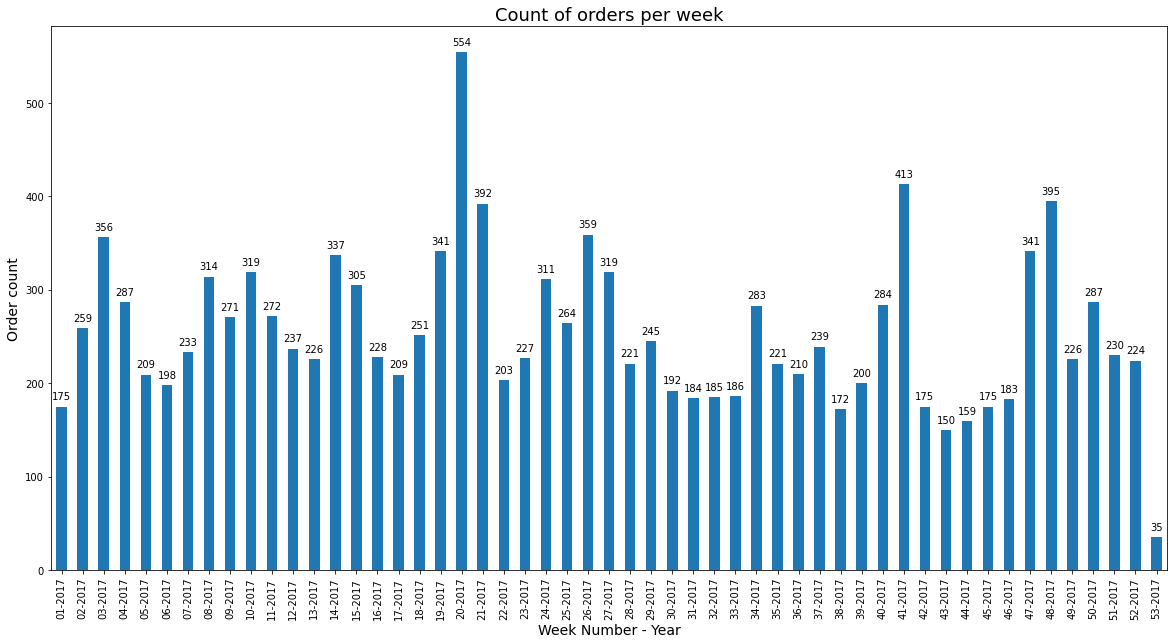

In [81]:
### Plot
# Resizing the plot canvas
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

# Bar Plot
b= weekly_order_count.plot.bar()
# Plot formatting
plt.title('Count of orders per week',fontsize=18)
plt.ylabel('Order count',fontsize=14)
plt.xlabel('Week Number - Year',fontsize=14)
# adding numeric labels on bars
for p in b.patches: b.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

# C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? Justify your choice of method.

### Assumptions : 
 

1.   The insights from this dataset are reflective of the data points captured for analysis, and is not reflective of characteristics (means, variance, significance, etc.) of a larger, more granular dataset.

2.   There are only 2 gender types - male & female.
#### [This dataset doesn't identify non-binary gender types, and therfore isn't an ideal dataset. A study suggests roughly 2 million americans do not identify themselves as male/female.]




In [82]:
# Calculate & print Mean Order Values for Gender 0 and Gender 1
g0_mean = dataset.groupby('gender')['value'].mean()[0]
g1_mean = dataset.groupby('gender')['value'].mean()[1]
print("Mean Order Value for Gender 0 = " + str(g0_mean))
print("Mean Order Value for Gender 1 = " + str(g1_mean))


Mean Order Value for Gender 0 = 363.89000591803506
Mean Order Value for Gender 1 = 350.70836114422


# I will be using a Null hypothesis as it helps giving a definition to significance in a dataset. It is a basic test used to determine statistical significance between parameters, with metrics to back up the test.

In [83]:
# Check Significance

# We can do a null-hypothesis test 
# Null Hypothesis : Mean order values of gender 0 and gender 1 are the same
# Alternate Hypothesis : Mean order values of gender 0 and gender 1 are the different

# Sample set
N = (dataset['customer_id'].count())/2

In [84]:
# Calculate variance of Gender 0 and Gender 1
g0_var = dataset.groupby('gender')['value'].var(ddof=1)[0]
g1_var = dataset.groupby('gender')['value'].var(ddof=1)[1]
print(g0_var)
print(g1_var)

157238.59072707873
142509.82682491044


In [85]:
# Calculate Std. Deviation
# Using sqrt (square root) from NumPy lib
sd = np.sqrt((g0_var + g1_var)/2)

In [86]:
# Calculate t-score
t = (g0_mean - g1_mean)/(sd*np.sqrt(2/N))
# for displaying result, I am rounding off the result to 4 decimals as well.
t_new = round(t,4)
print("The t-value is = " + str(t_new))

The t-value is = 1.976


In [87]:
# Degrees of freedom
df = 2*N - 2
print(df)


13469.0


In [88]:
# p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)
print(p)

0.02409037572936379


In [89]:
# This p-value is for half the sample
# therefore, we must multiply it by 2. I am rounding off the result to 4 decimals as well.
p_new = round(2*p,4)
print("The p-value is = " + str(p_new))

The p-value is = 0.0482


### Answer : Since the p-value < 0.05 we can reject the null, and can say with 95% certainity that mean order value of the two genders are different and statistically significant.

# D) Generate a confusion matrix for the gender predictions of customers in this dataset. You can assume that there is only one gender prediction for each customer. What does the confusion matrix tell you about the quality of the predictions?

In [90]:
# Confusion Matrix
confusion_matrix(dataset['gender'],dataset['predicted_gender'])

array([[3349, 3410],
       [1463, 5249]])

In [91]:
print('Accuracy  = ',accuracy_score(dataset['gender'],dataset['predicted_gender'])*100,'%')
print('Precision = ',precision_score(dataset['gender'],dataset['predicted_gender']))
print('Recall    = ',recall_score(dataset['gender'],dataset['predicted_gender']))
print('F1 Score  = ',f1_score(dataset['gender'],dataset['predicted_gender']))

Accuracy  =  63.825996585257215 %
Precision =  0.6061900912345537
Recall    =  0.7820321811680572
F1 Score  =  0.6829744323726498


#### Since the accuracy is just over 60% which is significantly low, I'd say that the overall quality of the predictions in our dataset can be improved.

#### Since we also have relatively high recall and low precision, we can say that the class is well detected, but the model includes points of other classes as well, and therefore not an accurate prediction.



# E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph, and please be specific.

### Answer : Using Random Forests on data sets can help us determine variable importance, help us decide which variable to use or discard for our analyses, and also tell us if there is co-relation between these variables.
### I have recently switched to Google Colab from Jupyter notebook, both of which very helpful tools for data analysis using Python libraries as they let me run code snippets, helping me focus on gathering insights from data,  rather than wasting time in debugging code. Google Colab however offers more computational power with access to Google Cloud services, provides specific processing units for working with tensor type datasets, which are likely to be found in Neural Network applications.